In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from matplotlib import dates as mpl_dates
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import folium

In [3]:
d = pd.read_excel('Milk.xlsx')
d

,PROVINCE,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED(Mt)
0,1.0,TAPLEJUNG,7512,5328,6323,5290,11613
1,1.0,SANKHUWASABHA,12911,11896,7918,11799,19717
2,1.0,SOLUKHUMBU,7612,13613,3788,5841,9629
3,1.0,PANCHTHAR,12728,12720,9855,10918,20773
4,1.0,ILAM,22995,7901,22180,13575,35755
...,...,...,...,...,...,...,...
80,7.0,DADELDHURA,12439,14250,8567,7586,16153
81,7.0,KAILALI,30871,44871,29851,37540,67391
82,7.0,KANCHANPUR,22320,26510,26541,28215,54756
83,NaN,Subtotal Sudurpaschim,143414,149524,103790,131284,235074


In [4]:
d.columns = d.columns.str.replace(r'\n','', regex=True)
d.columns

Index(['PROVINCE', 'DISTRICT', 'MILKING COWS NO.', 'MILKING BUFFALOES NO.',
       'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED(Mt)'],
      dtype='object')

In [5]:
d1 = d.groupby('DISTRICT')['TOTAL MILK PRODUCED(Mt)'].sum()
d1

DISTRICT
ACHHAM           17382
ARGHAKHANCHI     31514
BAGLUNG          25637
BAITADI          18020
BAJHANG          13002
                 ...  
TANAHU           49580
TAPLEJUNG        11613
TEHRATHUM        22585
UDAYAPUR         35816
WESTERN RUKUM    11660
Name: TOTAL MILK PRODUCED(Mt), Length: 85, dtype: int64

In [6]:
d2 = d1.drop(['Subtotal Province 1', 'Subtotal Province 2', 'Subtotal Province 3', 'Subtotal  Gandaki Province', 'Subtotal Province 5', 'Subtotal  Karnali ', 'Subtotal Sudurpaschim', 'Nepal'])
d2

DISTRICT
ACHHAM           17382
ARGHAKHANCHI     31514
BAGLUNG          25637
BAITADI          18020
BAJHANG          13002
                 ...  
TANAHU           49580
TAPLEJUNG        11613
TEHRATHUM        22585
UDAYAPUR         35816
WESTERN RUKUM    11660
Name: TOTAL MILK PRODUCED(Mt), Length: 77, dtype: int64

In [7]:
d2 = d2.reset_index()
d2

,DISTRICT,TOTAL MILK PRODUCED(Mt)
0,ACHHAM,17382
1,ARGHAKHANCHI,31514
2,BAGLUNG,25637
3,BAITADI,18020
4,BAJHANG,13002
...,...,...
72,TANAHU,49580
73,TAPLEJUNG,11613
74,TEHRATHUM,22585
75,UDAYAPUR,35816


In [8]:
d2.describe()

,TOTAL MILK PRODUCED(Mt)
count,77.000000
mean,27174.064935
std,18318.505609
min,261.000000
25%,14883.000000
50%,21998.000000
75%,37440.000000
max,91342.000000


In [9]:
d2[d2['TOTAL MILK PRODUCED(Mt)'] == 91342]

,DISTRICT,TOTAL MILK PRODUCED(Mt)
36,KAVREPALANCHOWK,91342


In [10]:
d0 = d2.sort_values('TOTAL MILK PRODUCED(Mt)', ascending= False).reset_index().head(10)
d0

,index,DISTRICT,TOTAL MILK PRODUCED(Mt)
0,36,KAVREPALANCHOWK,91342
1,43,MORANG,76066
2,30,KAILALI,67391
3,28,JHAPA,65325
4,32,KANCHANPUR,54756
5,71,SYANGJA,53190
6,11,CHITWAN,52495
7,34,KASKI,52193
8,69,SUNSARI,50207
9,72,TANAHU,49580


In [11]:
District_geo = 'nepal.geojson'
District_geo

'nepal.geojson'

In [12]:
data_to_plot = d2[['DISTRICT','TOTAL MILK PRODUCED(Mt)']]
data_to_plot.head()

,DISTRICT,TOTAL MILK PRODUCED(Mt)
0,ACHHAM,17382
1,ARGHAKHANCHI,31514
2,BAGLUNG,25637
3,BAITADI,18020
4,BAJHANG,13002


In [13]:
m = folium.Map(location=[28.3949, 84.1240], tiles='Mapbox Control Room', zoom_start=7.3, control_scale = True)

choropleth = folium.Choropleth(
    geo_data=District_geo,
    name='choropleth',
    data=data_to_plot,
    columns=['DISTRICT', 'TOTAL MILK PRODUCED(Mt)'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=4,
    line_opacity=4,
    legend_name='TOTAL MILK PRODUCTION (Mt) ',
    smooth_factor=0,
    highlight=True,
).add_to(m)

style_function = "font-size: 12px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['DISTRICT'], style=style_function, labels=False))

folium.LayerControl().add_to(m)

m



 



AttributeError: module 'folium' has no attribute 'Choropleth'

In [14]:
e1 = d.groupby('PROVINCE')['TOTAL MILK PRODUCED(Mt)'].sum()
e1

PROVINCE
1.0    416337
2.0    294195
3.0    391042
4.0    274505
5.0    367876
6.0    113374
7.0    235074
Name: TOTAL MILK PRODUCED(Mt), dtype: int64

In [15]:
e3 = e1.rename(index={'1': '1', '2': '2', '3': '3', 'Gandaki': '4', '5': '5', 'Karnali': '6', 'Sudurpaschim': '7'})
e3

PROVINCE
1.0    416337
2.0    294195
3.0    391042
4.0    274505
5.0    367876
6.0    113374
7.0    235074
Name: TOTAL MILK PRODUCED(Mt), dtype: int64

In [16]:
e2 = e3.reset_index()
e2

,PROVINCE,TOTAL MILK PRODUCED(Mt)
0,1.0,416337
1,2.0,294195
2,3.0,391042
3,4.0,274505
4,5.0,367876
5,6.0,113374
6,7.0,235074


In [17]:
e2.columns = e2.columns.str.replace(r'\n','', regex=True)
e2.columns

Index(['PROVINCE', 'TOTAL MILK PRODUCED(Mt)'], dtype='object')

In [18]:
e3 = e2.rename(index={'1': '1', '2': '2', '3': '3', 'Gandaki': '4', '5': '5', 'Karnali': '6', 'Sudurpaschim': '7'})
e3

,PROVINCE,TOTAL MILK PRODUCED(Mt)
0,1.0,416337
1,2.0,294195
2,3.0,391042
3,4.0,274505
4,5.0,367876
5,6.0,113374
6,7.0,235074


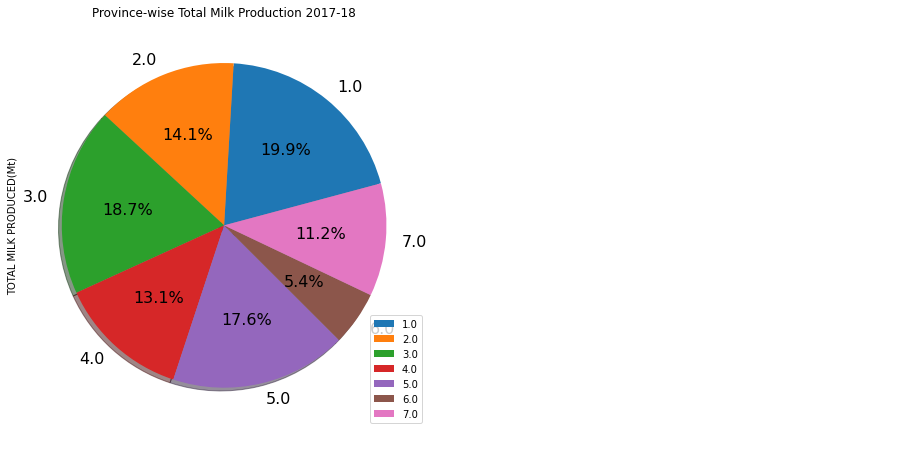

In [19]:

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
e2.plot(kind='pie', y = 'TOTAL MILK PRODUCED(Mt)', ax=ax1, autopct='%1.1f%%', 
 startangle=15, shadow=True, labels=e2['PROVINCE'], legend = True, fontsize=16)

# plot table
plt.title('Province-wise Total Milk Production 2017-18')
ax2 = plt.subplot(122)
plt.axis('off')

plt.show()

In [20]:
data_to_plot = e2[['PROVINCE','TOTAL MILK PRODUCED(Mt)']]
data_to_plot.head()

,PROVINCE,TOTAL MILK PRODUCED(Mt)
0,1.0,416337
1,2.0,294195
2,3.0,391042
3,4.0,274505
4,5.0,367876


In [21]:
m = folium.Map(location=[28.3949, 84.1240], tiles='Mapbox Control Room', zoom_start=7.3, control_scale = True)

folium.Choropleth(
    geo_data=District_geo,
    name='choropleth',
    data=data_to_plot,
    columns=['PROVINCE', 'TOTAL MILK PRODUCED(Mt)'],
    key_on='feature.properties.PROVINCE',
    fill_color='YlOrRd',
    fill_opacity=4,
    line_opacity=4,
    legend_name='TOTAL MILK PRODUCED(Mt)',
     smooth_factor=0,
    highlight=True
).add_to(m)

style_function = "font-size: 12px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['PROVINCE'], style=style_function, labels=False))

folium.LayerControl().add_to(m)

m

AttributeError: module 'folium' has no attribute 'Choropleth'